In [2]:
import matplotlib.pyplot as plt
import re 
import ast


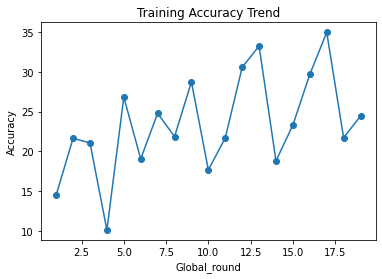

In [18]:
###plot the training accuracy

file_path = "/home/shiyue/FLsim/results/accuracy_trend.txt"

accuracy_values = []

with open(file_path,"r") as file:
    lines = file.readlines()

for line in lines:
    data = ast.literal_eval(line)
    accuracy = data['Accuracy']
    accuracy_values.append(accuracy)

epochs = range(1,len(accuracy_values)+1)
plt.plot(epochs,accuracy_values,marker='o',linestyle='-')

plt.xlabel("Global_round")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Trend")

plt.show()

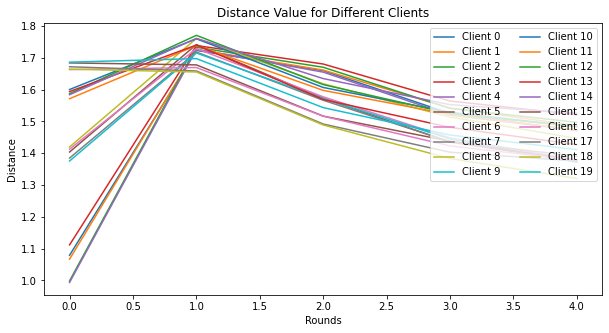

In [19]:
################################################################################
#######################plot the distance for each clients
################################################################################
# Define the file path
file_path = "/home/shiyue/FLsim/results/distance_values.txt"

# Initialize a dictionary to store client data
client_data = {}

# Read the data from the file
with open(file_path, "r") as file:
    for line in file:
        parts = line.split()
        client_number = int(parts[1][:-2])  # Extract the client number
        norm_value = float(parts[3])  # Extract the norm value
        if client_number not in client_data:
            client_data[client_number] = []
        client_data[client_number].append(norm_value)
# Set the figure size (adjust the width and height as needed)
plt.figure(figsize=(10, 5))
# Plot the data for all clients
for client_number, data in client_data.items():
    rounds = range(len(data))  # X-axis values
    plt.plot(rounds, data, label=f'Client {client_number}')

# Set plot labels and legend
plt.title("Distance Value for Different Clients")
plt.xlabel("Rounds")
plt.ylabel("Distance")
plt.legend(loc="upper right")

# Define the number of legend columns
num_legend_columns = 2  # Adjust as needed

# Create a legend with multiple columns
plt.legend(loc="upper right", ncol=num_legend_columns)

# Show the plot
plt.show()

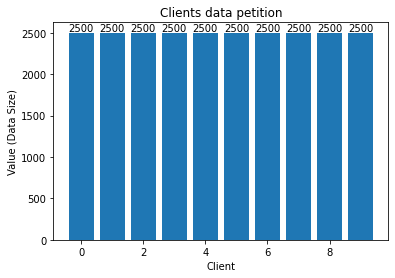

In [20]:
### plot the client data distribution
file_path = "/home/shiyue/FLsim/results/client_data_size.txt"

clients = []
data_sizes = []

with open (file_path, 'r') as file:
    lines = file.readlines()[:10]


for line in lines:
    parts = line.split(", ")
    client = int(parts[0].split(": ")[1])
    data_size = int(parts[1].split(": ")[1])
    clients.append(client)
    data_sizes.append(data_size)


plt.bar(clients,data_sizes)
plt.xlabel("Client")
plt.ylabel("Value (Data Size)")
plt.title("Clients data petition")

for i,value in enumerate(data_sizes):
    plt.text(clients[i],value,str(value),ha='center',va='bottom')

plt.show()





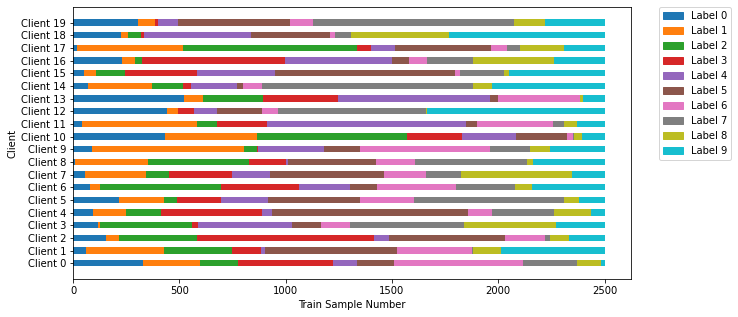

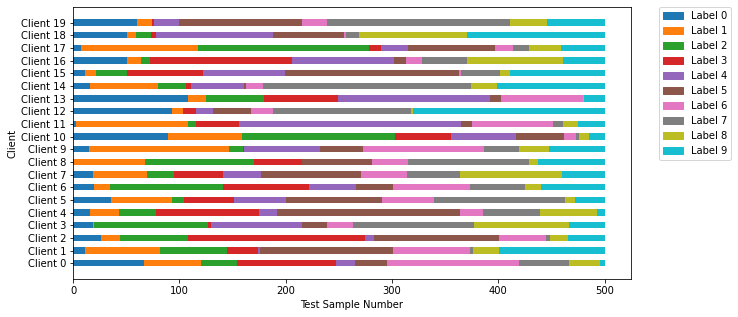

In [21]:
import matplotlib.pyplot as plt

file_path = "/home/shiyue/FLsim/results/non-iid_data_distribution.txt"

# Initialize dictionaries to store training and testing data for each client
train_data = {}
test_data = {}

# Read the file line by line
with open(file_path, 'r') as file:
    for line in file:
        # Split the line into words
        words = line.split()

        # Extract information from the line
        client_id = int(words[1][:-1])  # Extract the client ID
        data_type = words[2].lower()    # Extract whether it's training or testing data
        label = int(words[4][:-1])       # Extract the label
        samples = int(words[-1])        # Extract the number of samples

        # Update the corresponding dictionary
        if data_type == 'train':
            if client_id not in train_data:
                train_data[client_id] = {}
            train_data[client_id][label] = samples
        elif data_type == 'test':
            if client_id not in test_data:
                test_data[client_id] = {}
            test_data[client_id][label] = samples

# Combine training and testing data for plotting
data_to_plot_train = {**train_data}
data_to_plot_test = {**test_data}

# Plot for training data
fig, ax_train = plt.subplots(figsize=(10, 5))
legend_labels_train = set()  # Track unique labels for custom legend

for i, client in enumerate(data_to_plot_train):
    for j, label in enumerate(data_to_plot_train[client]):
        ax_train.barh(i, data_to_plot_train[client][label], left=sum([data_to_plot_train[client][l] for l in list(data_to_plot_train[client])[:j]]), height=0.5, color=f'C{j}')
        legend_labels_train.add(label)

ax_train.set_yticks(range(len(data_to_plot_train)))
ax_train.set_yticklabels([f'Client {c}' for c in data_to_plot_train.keys()])
ax_train.set_xlabel('Train Sample Number')
ax_train.set_ylabel('Client')

# Create a custom legend for training data
legend_handles_train = [plt.Rectangle((0, 0), 1, 1, color=f'C{j}', label=f'Label {label}') for j, label in enumerate(legend_labels_train)]
ax_train.legend(handles=legend_handles_train, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Plot for testing data
fig, ax_test = plt.subplots(figsize=(10, 5))
legend_labels_test = set()  # Track unique labels for custom legend

for i, client in enumerate(data_to_plot_test):
    for j, label in enumerate(data_to_plot_test[client]):
        ax_test.barh(i, data_to_plot_test[client][label], left=sum([data_to_plot_test[client][l] for l in list(data_to_plot_test[client])[:j]]), height=0.5, color=f'C{j}')
        legend_labels_test.add(label)

ax_test.set_yticks(range(len(data_to_plot_test)))
ax_test.set_yticklabels([f'Client {c}' for c in data_to_plot_test.keys()])
ax_test.set_xlabel('Test Sample Number')
ax_test.set_ylabel('Client')

# Create a custom legend for testing data
legend_handles_test = [plt.Rectangle((0, 0), 1, 1, color=f'C{j}', label=f'Label {label}') for j, label in enumerate(legend_labels_test)]
ax_test.legend(handles=legend_handles_test, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()


In [25]:
# clear all data under results folder
files_to_clear = [
    "/home/shiyue/FLsim/results/accuracy_trend.txt",
    "/home/shiyue/FLsim/results/client_data_size.txt",
    "/home/shiyue/FLsim/results/client_selection_log.txt",
    "/home/shiyue/FLsim/results/distance_values.txt",
    "/home/shiyue/FLsim/results/eva_accuracy_per_round.txt",
    "/home/shiyue/FLsim/results/non-iid_data_distribution.txt"
]

for file_path in files_to_clear:
    with open(file_path, 'w') as file:
        file.truncate()
